# Importing libraries

In [84]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.image import imread

# Importing Dataset

In [85]:
dataset = pd.read_csv('out.csv')
print(dataset)

                    image label
0     nimg/img001-001.png     0
1     nimg/img001-002.png     0
2     nimg/img001-003.png     0
3     nimg/img001-004.png     0
4     nimg/img001-005.png     0
...                   ...   ...
3405  nimg/img062-051.png     z
3406  nimg/img062-052.png     z
3407  nimg/img062-053.png     z
3408  nimg/img062-054.png     z
3409  nimg/img062-055.png     z

[3410 rows x 2 columns]


# Importing images from dataset

In [86]:
from skimage.transform import resize
x,y = [],[]
for i in range(0,550):
    img = imread(dataset.iloc[i,0])
    x.append(img)
    y.append(dataset.iloc[i,1])

## Converting x,y to numpy arrays

In [87]:
x = np.array(x)
y = np.array(y)

## Splitting data into train and test sets

In [88]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

## visualising first 4 images from training set

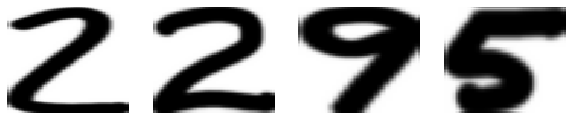

In [89]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, x_train, y_train):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')

## reshaping the arrays to train (flatining images)

In [90]:
x_train = x_train.reshape((len(x_train),-1))
x_test = x_test.reshape((len(x_test),-1))

# Training and testing our model

In [95]:
from sklearn.svm import SVC
classifier = SVC(gamma=0.0001,C=10)
classifier.fit(x_train,y_train)

SVC(C=10, gamma=0.0001)

In [96]:
y_pred = classifier.predict(x_test)

## Checking accuracy and confusion matrix for our model 

In [97]:
from sklearn.metrics import accuracy_score,classification_report
print(accuracy_score(y_test,y_pred))

0.9727272727272728


In [98]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         9
           3       0.91      0.91      0.91        11
           4       1.00      1.00      1.00        10
           5       0.90      1.00      0.95         9
           6       1.00      1.00      1.00         9
           7       1.00      1.00      1.00        12
           8       1.00      0.93      0.97        15
           9       0.93      0.93      0.93        14

    accuracy                           0.97       110
   macro avg       0.97      0.98      0.98       110
weighted avg       0.97      0.97      0.97       110

